In [4]:
# Find interesting jobs with high # of tasks and high # of slots/resource usage
# Log task graph release time in simulator.py for normal run

from collections import namedtuple
import math
import os
import pickle
import numpy as np

Task = namedtuple(
    "Task",
    field_names="name,job,instances,status,start_time,end_time,duration,cpu,mem",
)

# First, find the distribution of tasks per job graph and slots per task
slots = []
tasks_per_job_graph = []

jobs_having_tasks_with_more_than_one_slot = {}
slots_in_jobs_having_tasks_with_more_than_one_slot = []

for filename in os.listdir("../traces/alibaba-cluster-trace-v2018/job_dag_files_6600_groups"):
    with open(f"../traces/alibaba-cluster-trace-v2018/job_dag_files_6600_groups/{filename}", "rb") as pickled_file:
        data = pickle.load(pickled_file)    
        for job_graph_name, job_tasks in data.items():
            tasks_per_job_graph.append(len(job_tasks))
            try:
                has_tasks_with_more_than_one_slot = False
                for task in job_tasks:
                    slot_usage = int(math.ceil(task.cpu / 25))
                    slots.append(slot_usage)
                    if slot_usage > 1:
                        has_tasks_with_more_than_one_slot = True
                        slots_in_jobs_having_tasks_with_more_than_one_slot.append(slot_usage)
                if has_tasks_with_more_than_one_slot:
                    jobs_having_tasks_with_more_than_one_slot[job_graph_name] = job_tasks
            except:
                continue

slots.sort()
tasks_per_job_graph.sort()
print(f"avg slots per task: {np.mean(slots):.2f}, std: {np.std(slots):.2f}, median: {np.median(slots):.2f}, max: {np.max(slots):.2f}")
print(f"avg tasks_per_job_graph: {np.mean(tasks_per_job_graph):.2f}, std: {np.std(tasks_per_job_graph):.2f}, median: {np.median(tasks_per_job_graph):.2f}, max: {np.max(tasks_per_job_graph):.2f}")
print(f"Total # of tasks: {len(slots)}")
print(f"# of tasks with slot > 1: {len([x for x in slots if x > 1])}")

print(f"jobs having tasks with more than one slot: {len(jobs_having_tasks_with_more_than_one_slot)}")
print(f"avg slots per task for task in such jobs: {np.mean(slots_in_jobs_having_tasks_with_more_than_one_slot):.2f}, std: {np.std(slots_in_jobs_having_tasks_with_more_than_one_slot):.2f}, median: {np.median(slots_in_jobs_having_tasks_with_more_than_one_slot):.2f}")
tasks_per_job_graph_for_jobs_with_high_slot_usage = [len(job_tasks) for job_tasks in jobs_having_tasks_with_more_than_one_slot.values()]
print(f"avg tasks_per_job_graph: {np.mean(tasks_per_job_graph_for_jobs_with_high_slot_usage):.2f}, std: {np.std(tasks_per_job_graph_for_jobs_with_high_slot_usage):.2f}, median: {np.median(tasks_per_job_graph_for_jobs_with_high_slot_usage):.2f}")

avg slots per task: 1.00, std: 0.06, median: 1.00, max: 8.00
avg tasks_per_job_graph: 3.78, std: 4.73, median: 2.00, max: 203.00
Total # of tasks: 11977619
# of tasks with slot > 1: 5181
jobs having tasks with more than one slot: 1437
avg slots per task for task in such jobs: 2.92, std: 1.93, median: 2.00
avg tasks_per_job_graph: 12.43, std: 6.12, median: 16.00


In [ ]:
# save jobs_having_tasks_with_more_than_one_slot as pkl
with open("../traces/alibaba-cluster-trace-v2018/jobs_having_tasks_with_more_than_one_slot.pkl", "wb") as f:
    pickle.dump(jobs_having_tasks_with_more_than_one_slot, f)

In [ ]:
import matplotlib.pyplot as plt

plt.hist(slots_in_jobs_having_tasks_with_more_than_one_slot)
plt.xlabel("Slots")
plt.ylabel("Count")
plt.title("Task slots distribution for jobs having tasks with more than one slot")
plt.show()

In [10]:
# Find interesting jobs with high # of tasks and high # of slots/resource usage
# Log task graph release time in simulator.py for normal run

from collections import namedtuple
import math
import os
import pickle
import numpy as np

Task = namedtuple(
    "Task",
    field_names="name,job,instances,status,start_time,end_time,duration,cpu,mem",
)

# First, find the distribution of tasks per job graph and slots per task
slots = []
tasks_per_job_graph = []

jobs_having_tasks_with_more_than_one_slot = {}
slots_in_jobs_having_tasks_with_more_than_one_slot = []

with open(f"../traces/alibaba-cluster-trace-v2018/alibaba_set_0_6600_dags.pkl", "rb") as pickled_file:
    data = pickle.load(pickled_file)    
    for job_graph_name, job_tasks in data.items():
        tasks_per_job_graph.append(len(job_tasks))
        try:
            has_tasks_with_more_than_one_slot = False
            for task in job_tasks:
                slot_usage = int(math.ceil(task.cpu / 25))
                slots.append(slot_usage)
                if slot_usage > 1:
                    has_tasks_with_more_than_one_slot = True
                    slots_in_jobs_having_tasks_with_more_than_one_slot.append(slot_usage)
            if has_tasks_with_more_than_one_slot:
                jobs_having_tasks_with_more_than_one_slot[job_graph_name] = job_tasks
        except:
            continue

slots.sort()
tasks_per_job_graph.sort()
print(f"avg slots per task: {np.mean(slots):.2f}, std: {np.std(slots):.2f}, median: {np.median(slots):.2f}, max: {np.max(slots):.2f}")
print(f"avg tasks_per_job_graph: {np.mean(tasks_per_job_graph):.2f}, std: {np.std(tasks_per_job_graph):.2f}, median: {np.median(tasks_per_job_graph):.2f}, max: {np.max(tasks_per_job_graph):.2f}")
print(f"Total # of tasks: {len(slots)}")
print(f"# of tasks with slot > 1: {len([x for x in slots if x > 1])}")

print(f"jobs having tasks with more than one slot: {len(jobs_having_tasks_with_more_than_one_slot)}")
print(f"avg slots per task for task in such jobs: {np.mean(slots_in_jobs_having_tasks_with_more_than_one_slot):.2f}, std: {np.std(slots_in_jobs_having_tasks_with_more_than_one_slot):.2f}, median: {np.median(slots_in_jobs_having_tasks_with_more_than_one_slot):.2f}")
tasks_per_job_graph_for_jobs_with_high_slot_usage = [len(job_tasks) for job_tasks in jobs_having_tasks_with_more_than_one_slot.values()]
print(f"avg tasks_per_job_graph: {np.mean(tasks_per_job_graph_for_jobs_with_high_slot_usage):.2f}, std: {np.std(tasks_per_job_graph_for_jobs_with_high_slot_usage):.2f}, median: {np.median(tasks_per_job_graph_for_jobs_with_high_slot_usage):.2f}")

avg slots per task: 3.15, std: 1.00, median: 4.00, max: 20.00
avg tasks_per_job_graph: 3.82, std: 4.69, median: 2.00, max: 72.00
Total # of tasks: 25134
# of tasks with slot > 1: 25134
jobs having tasks with more than one slot: 6588
avg slots per task for task in such jobs: 3.15, std: 1.00, median: 4.00
avg tasks_per_job_graph: 3.81, std: 4.69, median: 2.00


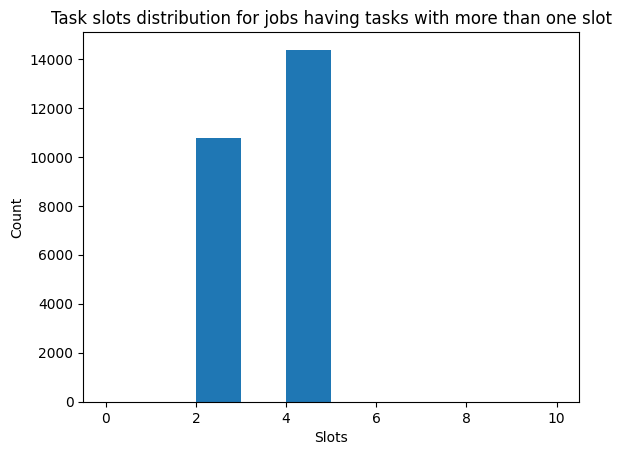

In [12]:
import matplotlib.pyplot as plt

plt.hist(slots, range=(0, 10))
plt.xlabel("Slots")
plt.ylabel("Count")
plt.title("Task slots distribution for jobs having tasks with more than one slot")
plt.show()